# Problem Statement:

The goal of the project is to build a predictive model and discover the sales of each product at the 10 given stores, so BigMart will try to understand the properties of products as well as the stores to increase its sales and figure out the products that have low sales

The dataset consists of 8,523 records within 12 different columns (Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, and Item_Outlet_Sales)

Importing the needed libraries and data (train and test)

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import datetime
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso #a specific type of regularized linear regression
from sklearn.ensemble import RandomForestRegressor

train_data = pd.read_csv("Sales/Train.csv")
test_data = pd.read_csv("Sales/Test.csv")
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


Overview of the data

In [100]:
train_data.dtypes #check the type of the data(7 object_type cols(categorical),4 float type(numerical), 1 integer col(numerical))

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [101]:
train_data.head() #get the first five rows of the data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [102]:
train_data.info() #to check the no. of null values and think how to treat the missing data values
#can be done by print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


EDA Steps:

Missing values treatment using mean since they are float and integer data types

In [103]:
updated_data = train_data
updated_data['Item_Weight']=updated_data['Item_Weight'].fillna(updated_data['Item_Weight'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [104]:
updated_data = train_data
updated_data['Outlet_Size']=updated_data['Outlet_Size'].fillna(updated_data['Outlet_Size'].mode()[0])
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [105]:
train_data.isnull().sum() #checking the filling of the data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [106]:
test_data.isnull().sum() #check the missing values of the test_data

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [107]:
updated_data = test_data
updated_data['Item_Weight']=updated_data['Item_Weight'].fillna(updated_data['Item_Weight'].mean())
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [108]:
updated_data = test_data
updated_data['Outlet_Size']=updated_data['Outlet_Size'].fillna(updated_data['Outlet_Size'].mode()[0])
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                5681 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [109]:
test_data.isnull().sum() #check the missing values treatment of the test_data

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Outliers checking and removal of the numeric data

<Axes: >

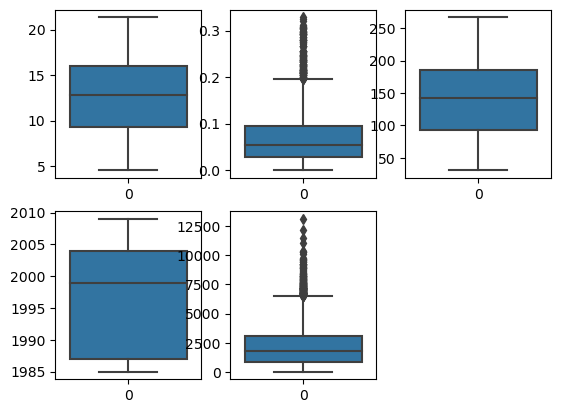

In [110]:
plt.figsize = (10,6)
plt.subplot(2,3,1)
sns.boxplot(train_data['Item_Weight']) #more common to use boxplot for numeric data

plt.subplot(2,3,2)
sns.boxplot(train_data['Item_Visibility'])

plt.subplot(2,3,3)
sns.boxplot(train_data['Item_MRP'])

plt.subplot(2,3,4)
sns.boxplot(train_data['Outlet_Establishment_Year'])

plt.subplot(2,3,5)
sns.boxplot(train_data['Item_Outlet_Sales'])

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


Text(0.5, 1.0, 'Item_Visibility Distribution after removing outliers')

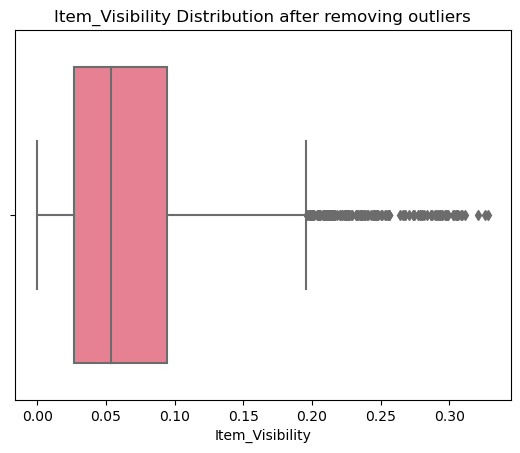

In [111]:
def outliers(df, feature): #ouliers removal of the item_visibility column
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train_data, "Item_Visibility")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
data = train_data[(train_data['Item_Visibility'] > lower) & (train_data['Item_Visibility'] < upper)]


sns.boxplot(x=train_data['Item_Visibility'], palette='husl')
plt.title('Item_Visibility Distribution after removing outliers')

Upper limit:  6501.8699
Lower limit:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

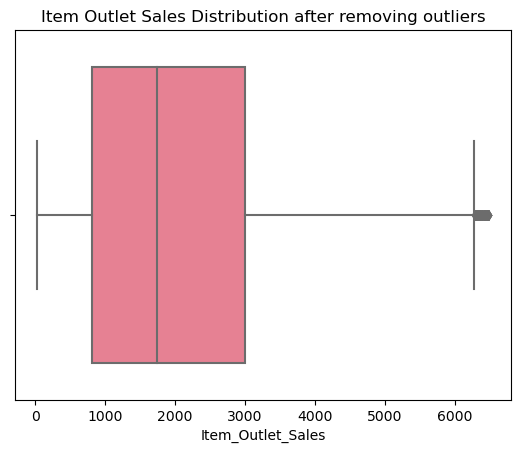

In [112]:
def outliers(df, feature): #ouliers removal of the Item_Outlet_Sales column
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train_data, "Item_Outlet_Sales")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train_data = train_data[(train_data['Item_Outlet_Sales'] > lower) & (train_data['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train_data['Item_Outlet_Sales'], palette='husl')
plt.title('Item Outlet Sales Distribution after removing outliers')

Upper limit:  319.66819999999996
Lower limit:  -42.92699999999999


Text(0.5, 1.0, 'Item MRP Distribution after removing outliers')

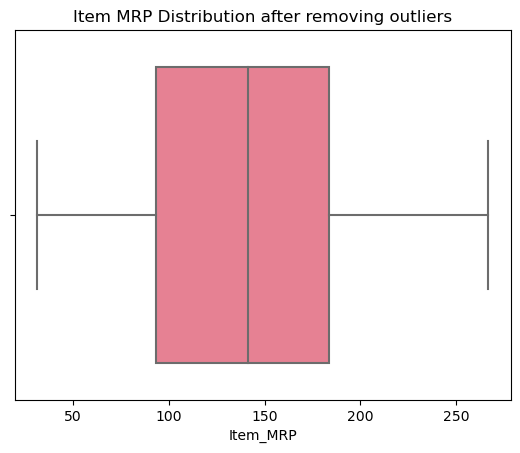

In [113]:
def outliers(df, feature): #ouliers removal of the Item_MRP column
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train_data, "Item_MRP")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train_data = train_data[(train_data['Item_MRP'] > lower) & (train_data['Item_MRP'] < upper)]

sns.boxplot(x=train_data['Item_MRP'], palette='husl')
plt.title('Item MRP Distribution after removing outliers')

Upper limit:  2029.5
Lower limit:  1961.5


Text(0.5, 1.0, 'Outlet Establishment Year Distribution after removing outliers')

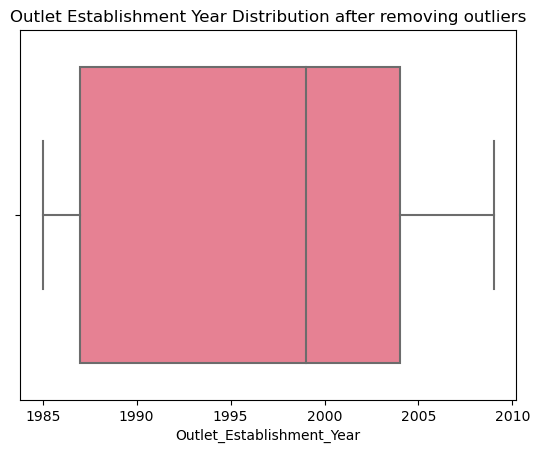

In [114]:
def outliers(df, feature): #ouliers removal of the Outlet_Establishment_Year column
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train_data, "Outlet_Establishment_Year")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train_data = train_data[(train_data['Outlet_Establishment_Year'] > lower) & (train_data['Outlet_Establishment_Year'] < upper)]

sns.boxplot(x=train_data['Outlet_Establishment_Year'], palette='husl')
plt.title('Outlet Establishment Year Distribution after removing outliers')

Upper limit:  26.300000000000004
Lower limit:  -0.9000000000000004


Text(0.5, 1.0, 'Item Weight after removing outliers')

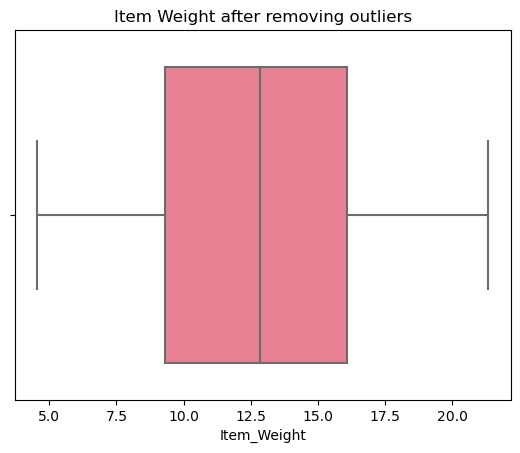

In [115]:
def outliers(df, feature):  #ouliers removal of the Item_Weight column
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(train_data, "Item_Weight")
print("Upper limit: ",upper)
print("Lower limit: ",lower)
train_data = train_data[(train_data['Item_Weight'] > lower) & (train_data['Item_Weight'] < upper)]

sns.boxplot(x=train_data['Item_Weight'], palette='husl')
plt.title('Item Weight after removing outliers')

Univariate analysis

<Axes: >

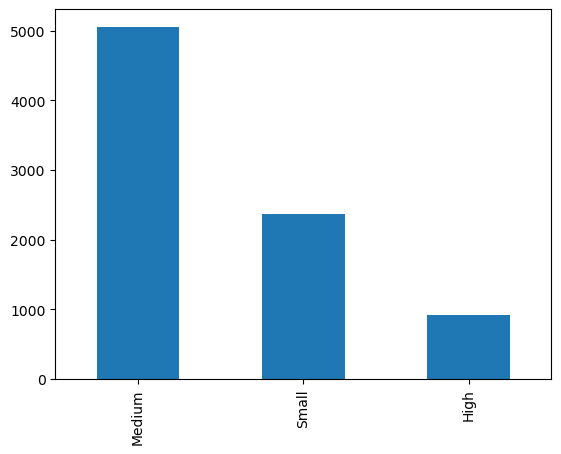

In [116]:
train_data['Outlet_Size'].value_counts().plot.bar() #the plotbar is used for categorical data type(object)

<Axes: >

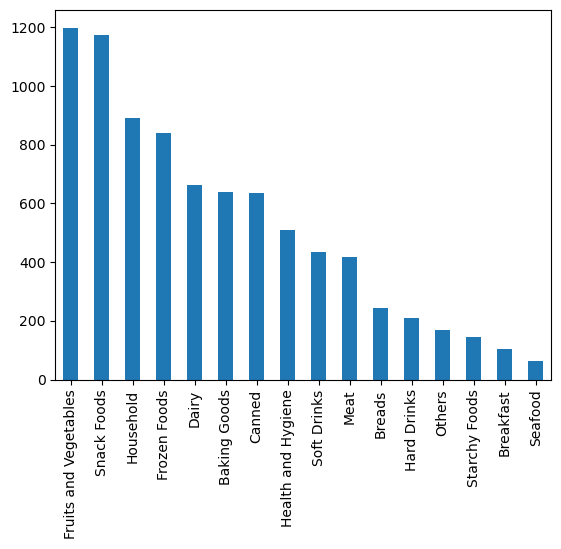

In [117]:
train_data['Item_Type'].value_counts().plot.bar() 

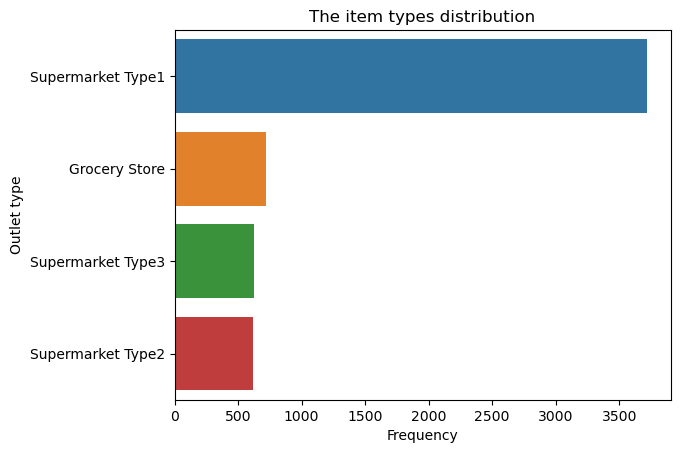

In [118]:
item_counts = test_data['Outlet_Type'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index)
# Labelling the axes and titling the barplot
plt.xlabel('Frequency')
plt.ylabel('Outlet type')
plt.title('The item types distribution')
plt.show()

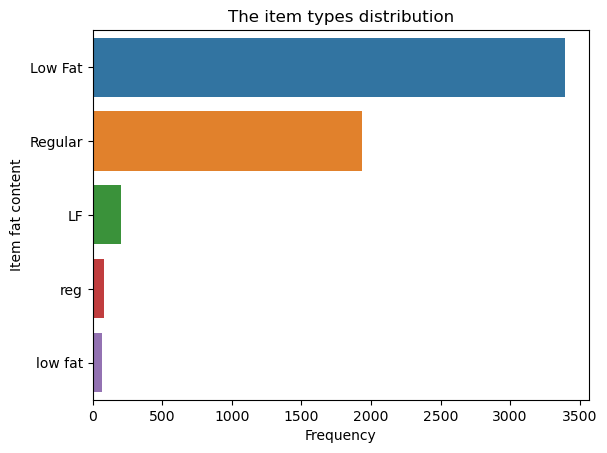

In [119]:
item_counts = test_data['Item_Fat_Content'].value_counts()
sns.barplot(x=item_counts.values, y=item_counts.index)
plt.xlabel('Frequency')
plt.ylabel('Item fat content')
plt.title('The item types distribution')
plt.show()

Bivariate Analysis:

Text(0, 0.5, 'Item Outlet Sales')

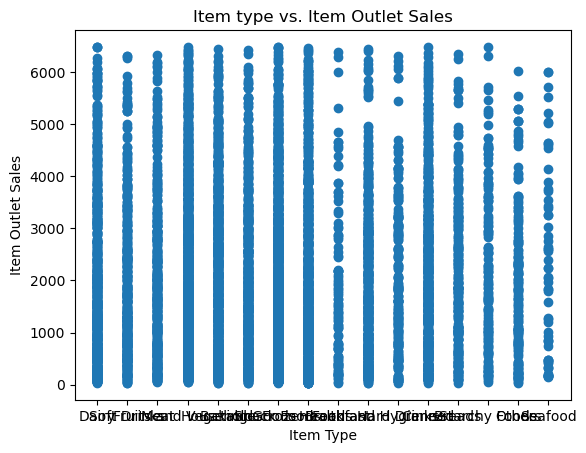

In [120]:
plt.scatter(train_data.Item_Type, train_data.Item_Outlet_Sales) #scatterplot are better for numeric data 
plt.title('Item type vs. Item Outlet Sales')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Outlet Sales')

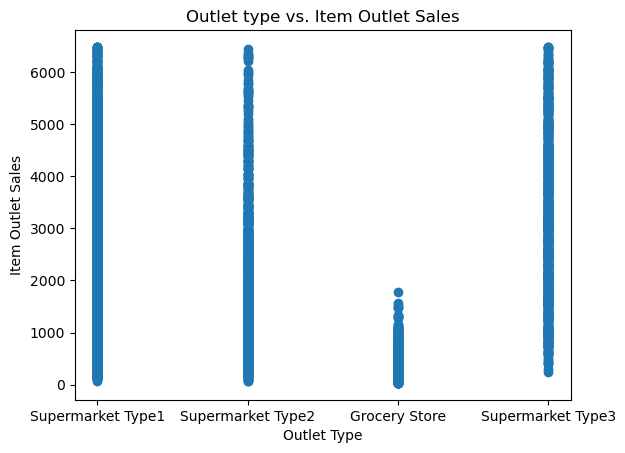

In [121]:
plt.scatter(train_data['Outlet_Type'], train_data['Item_Outlet_Sales'])
plt.title('Outlet type vs. Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')

Text(0, 0.5, 'Item Visibility')

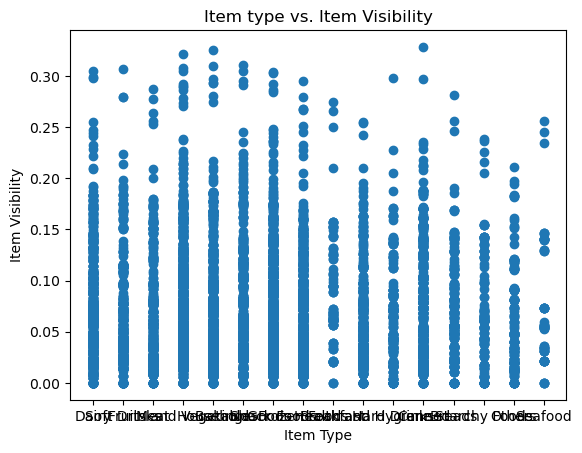

In [122]:
plt.scatter(train_data['Item_Type'], train_data['Item_Visibility'])
plt.title('Item type vs. Item Visibility')
plt.xlabel('Item Type')
plt.ylabel('Item Visibility')

Feature Engineering

We have 7 categorial cols where 3 as Ordinal Data and 4 as Nominal Data:

Ordinal Data (has a rank but does not have equal/meaningful difference):
Item_Fat_Content
Outlet_Size
Outlet_Location_Type
Nominal Data (has no order but has labels/names):
Item_Identifier
Item_Type
Outlet_Identifier
Outlet_Type

#Label Encoder for catrogorical data type

In [127]:
data = pd.DataFrame() #an empty DataFrame to store the encoded data to keep the original data intact
le = LabelEncoder() #a LabelEncoder object
# define the list of ordinal data 
label = ['Item_Fat_Content','Outlet_Type','Outlet_Size','Outlet_Location_Type', 'Item_Identifier','Item_Type','Outlet_Identifier','Item_Outlet_Sales']
# encode the ordinal data and store it in the data DataFrame
for i in label:
  encoded_data = le.fit_transform(train_data[i])
  data[i] = encoded_data
print(data.head())

   Item_Fat_Content  Outlet_Type  Outlet_Size  Outlet_Location_Type  \
0                 1            1            1                     0   
1                 2            2            1                     2   
2                 1            1            1                     0   
3                 2            0            1                     2   
4                 1            1            0                     2   

   Item_Identifier  Item_Type  Outlet_Identifier  Item_Outlet_Sales  
0              156          4                  9               2540  
1                8         14                  3                422  
2              662         10                  9               1639  
3             1121          6                  0                670  
4             1297          9                  1                865  


Preprocessing for the test data (Labelencoder)

In [131]:
data2 = pd.DataFrame() #an empty DataFrame to store the encoded data to keep the original data intact
le = LabelEncoder() #a LabelEncoder object
# define the list of ordinal data 
label = ['Item_Fat_Content','Outlet_Type','Outlet_Size','Outlet_Location_Type', 'Item_Identifier','Item_Type','Outlet_Identifier']
# encode the ordinal data and store it in the data DataFrame
for i in label:
  encoded_data = le.fit_transform(test_data[i])
  data2[i] = encoded_data
print(data2.head())

   Item_Fat_Content  Outlet_Type  Outlet_Size  Outlet_Location_Type  \
0                 1            1            1                     0   
1                 4            1            1                     1   
2                 1            0            1                     2   
3                 1            1            1                     1   
4                 2            3            1                     2   

   Item_Identifier  Item_Type  Outlet_Identifier  
0             1103         13                  9  
1             1067          4                  2  
2             1406         11                  0  
3              809         13                  2  
4             1184          4                  5  


OneHotEncoder on the categorical columns

In [124]:
object_cols = train_data.select_dtypes(include=['object']).columns
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Apply one-hot encoder to the col of categorical data
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_data[object_cols]))
OH_cols_train.index = train_data.index
num_X_train = train_data.drop(object_cols, axis=1)
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_train.head() #check the application of the OneHotEncoder

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,0,1,2,3,4,...,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599
0,9.30,0.016047,249.8092,1999,3735.1380,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,0.019278,48.2692,2009,443.4228,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,0.016760,141.6180,1999,2097.2700,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,0.000000,182.0950,1998,732.3800,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,8.93,0.000000,53.8614,1987,994.7052,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


Preprocessing for the test data (One_Hot encoding)

In [152]:
object_cols = test_data.select_dtypes(include=['object']).columns
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Apply one-hot encoder to the col of categorical data
OH_cols_test = pd.DataFrame(OH_encoder.fit_transform(test_data[object_cols]))
OH_cols_test.index = test_data.index
num_X_test = test_data.drop(object_cols, axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)
OH_X_test.columns = OH_X_test.columns.astype(str)
OH_X_test.head() #check the application of the OneHotEncoder

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,0,1,2,3,4,5,...,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583
0,20.750000,0.007565,107.8622,1999,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,8.300000,0.038428,87.3198,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.600000,0.099575,241.7538,1998,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,7.315000,0.015388,155.0340,2007,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,12.695633,0.118599,234.2300,1985,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Modeling

The linear Regression Model:

In [97]:
# Split the data into X and y
y_train = train_data['Item_Outlet_Sales']
#  one-hot encoding on the categorical variables in X_train
X_train = OH_X_train.drop(['Item_Outlet_Sales'], axis=1) 
# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the training data and calculate the mean absolute error
y_train = y_train.values.reshape(-1, 1)
lr_predict = model.predict(X_train)
mae_score = mean_absolute_error(y_train, lr_predict)
print("MAE on training data:", mae_score)

MAE on training data: 692.0051340919995


In [37]:
#I read that it's better to use onehotencoding when using linear regression model but i will try it on the label encoding

In [129]:
y_train = train_data['Item_Outlet_Sales']
# label encoding on the categorical variables in X_train
X_train = data.drop(['Item_Outlet_Sales'], axis=1) 
model = LinearRegression()
model.fit(X_train, y_train)
y_train = y_train.values.reshape(-1, 1)
lr_predict = model.predict(X_train)
mae_score = mean_absolute_error(y_train, lr_predict)
print("MAE on training data:", mae_score)


MAE on training data: 1090.7623095273118


Specific type of Regularized Linear Regression, lasso, model

In [41]:
y_train = train_data['Item_Outlet_Sales']
# one-hot encoding on the categorical variables in X_train
X_train = OH_X_train.drop(['Item_Outlet_Sales'], axis=1) 
model = Lasso()
model.fit(X_train , y_train)
lasso_prediction = model.predict(X_train)
y_train = y_train.values.reshape(-1, 1)
lasso_prediction = model.predict(X_train)
mae_score = mean_absolute_error(y_train, lasso_prediction)
print("MAE on training data:", mae_score)

MAE on training data: 768.3568015769265


In [47]:
y_train = train_data['Item_Outlet_Sales']
# label encoding on the categorical variables in X_train
X_train = OH_X_train.drop(['Item_Outlet_Sales'], axis=1) 
model = Lasso()
model.fit(X_train , y_train)
lasso_prediction = model.predict(X_train)
# Make predictions on the training data and calculate the mean absolute error
y_train = y_train.values.reshape(-1, 1)
lasso_prediction = model.predict(X_train)
mae_score = mean_absolute_error(y_train, lasso_prediction)
print("MAE on training data:", mae_score)

MAE on training data: 768.3568015769265


In [ ]:
RandomForestRegressor Model

In [42]:
y_train = train_data['Item_Outlet_Sales']
# one-hot encoding on the categorical variables in X_train
X_train = OH_X_train.drop(['Item_Outlet_Sales'], axis=1) 
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
model.fit(X_train, y_train)
forest_predict = model.predict(X_train)
y_train = y_train.values.reshape(-1, 1)
RFR_MAE = mean_absolute_error(y_train, forest_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")

 Mean Absolute Error: 693.6062221847772



In [88]:
y_train = train_data['Item_Outlet_Sales']
# label encoding on the categorical variables in X_train
X_train = train_data.drop(['Item_Outlet_Sales'], axis=1) 
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)
model.fit(X_train, y_train)
forest_predict = model.predict(X_train)
y_train = y_train.values.reshape(-1, 1)
RFR_MAE = mean_absolute_error(y_train, forest_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")

 Mean Absolute Error: 748.1934249679836



xgboost Model

In [89]:
y_train = train_data['Item_Outlet_Sales']
#  one-hot encoding on the categorical variables in X_train
X_train = OH_X_train.drop(['Item_Outlet_Sales'], axis=1) 
model = XGBRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
y_train = y_train.values.reshape(-1, 1)
XG_MAE = mean_absolute_error(y_train, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")

 Mean Absolute Error: 650.8480887463154



In [90]:
y_train = train_data['Item_Outlet_Sales']
#  label encoding on the categorical variables in X_train
X_train = train_data.drop(['Item_Outlet_Sales'], axis=1) 
model = XGBRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_train)
y_train = y_train.values.reshape(-1, 1)
XG_MAE = mean_absolute_error(y_train, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")

 Mean Absolute Error: 501.15223777321256



In [ ]:
#The best model, the one with the lowest MAE, is the XGboost with applying onehotencoding, so I will apply it on the test_data

In [140]:
lr_predict2 = model.predict(data2)

In [141]:
lr_predict2 #This is the prediction of the model

array([2542.0569594 , 1859.97024545,  785.72261064, ..., 2196.88983333,
       1775.49323162, 2187.55336644])